# Descripción del proyecto

**Autor:** Cristian Jeraldo, www.asgeominspa.com

**Fecha:** 13 de junio de 2024

**Descripción:** Este notebook contiene los pasos necesarios para desarrollar un análisis de contaminación, incluyendo la visualización de resultados y la aplicación de técnicas estadísticas de medición.

# Importación de librerías

In [1]:
# Librerías visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías manipulación de datos
import numpy as np
import pandas as pd

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importación de datos

In [2]:
# Importación de datos
df = pd.read_csv('contaminación_Cu.csv')

In [3]:
df.head(3)

,SAMPLE_ID,Inserto,Cu,Origen
0,STD HIGH 1,1,0.02,P2022-111 Análisis Estandares MSDv3.xlsx
1,STD HIGH 2,2,0.01,P2022-111 Análisis Estandares MSDv3.xlsx
2,STD HIGH 3,3,0.02,P2022-111 Análisis Estandares MSDv3.xlsx


In [4]:
df.shape

(30, 4)

# Gráfico de Contaminación

In [5]:
# Ejes para gráfico de control de contaminación
x = df['Inserto']
y = df['Cu']

In [6]:
# Editar tipo de control, analito y laboratorio 
control = 'blanco fino' # analítico o de preparación mecánica
analito = 'Cu (%)'
lab = 'Bureau Veritas Antofagasta, Chile'

In [7]:
# Límite de aceptación
limit = 0.1

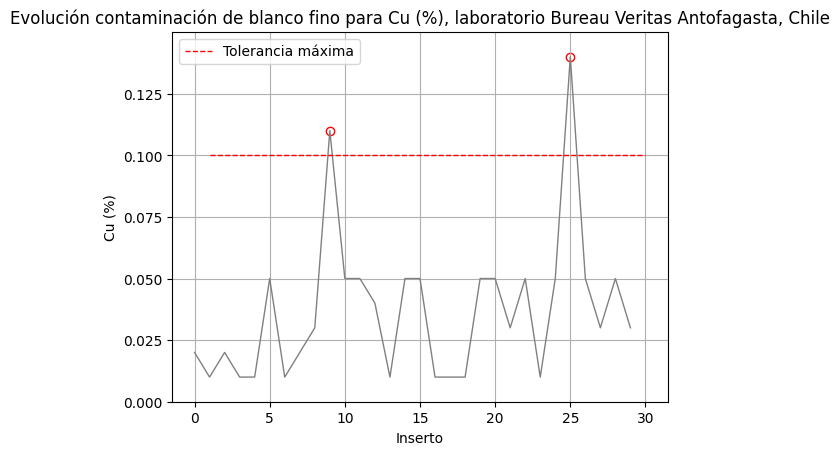

In [8]:
# Gráfico de control de contaminación
fig,ax = plt.subplots()

ax.set_title("Evolución contaminación de {} para {}, laboratorio {}".format(control,analito,lab))

# lineplot de insertos 
ax.plot(y, color='grey', linewidth=1)

# lineplot edgecolors para errores
for i in range(1,len(y)):
    if y[i] > limit:
        ax.scatter(x[i-1],y[i], edgecolors='red', color='white')
    else:
        ax.scatter(x[i-1],y[i], color='white')       
    
# Líneas de control    
ax.hlines(y=limit, xmin=1, xmax=len(df), linewidth=1, color='red', linestyles='--', label='Tolerancia máxima')
plt.legend()

# Editar rango eje Y (ley) y frecuencia de tick marks
plt.ylim([0.0,0.15])
plt.yticks(np.arange(0.0,0.15,0.025))

# Identificar círculos con color rojo
colors = np.where(y > limit, 'r', 'w')

# Contar los puntos sobre Límite de aceptación (puntos rojos)
num_puntos_sobre_limit = np.sum(colors == 'r')

# Ploteo de grilla
plt.grid()

# Títulos de ejes
plt.xlabel('Inserto')
plt.ylabel(analito);

**Comentarios:**
- No se identifican resultados con fallas para BP (blanco pulpa): sin contaminación       

# Cálculo porcentaje controles sobre Límite de Especificación

In [9]:
# Porcentaje de fallos
fallos = num_puntos_sobre_limit / len(x) * 100

In [10]:
print("El porcentaje de fallos de {} para {} en laboratorio {} es {:.2f}".format(control,analito,lab,fallos))

El porcentaje de fallos de blanco fino para Cu (%) en laboratorio Bureau Veritas Antofagasta, Chile es 6.67


**Conclusión:**
- Porcentaje de muestras sobre límite de especificación cuestionable, tomando como base 5% de aceptación.